In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "/Users/macowner/Desktop/mouse_drug_data.csv"
clinical_trial_data_to_load = "/Users/macowner/Desktop/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_drug_data, clinical_trial_data,
                                 how='outer', on='Mouse ID')
combined_data_df.head()

# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_avg= combined_data_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

#combined_data_df = combined_data_sort.mean()['Tumor Volume(mm3)']

# Convert to DataFrame
df1 = pd.DataFrame(data = tumor_volume_avg)
# Preview DataFrame
df1.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [21]:
df1.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem= combined_data_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
df2 = pd.DataFrame(data = tumor_volume_sem)
# Preview DataFrame
df2.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [23]:
df2.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [45]:
# Minor Data Munging to Re-Format the Data Frames

Tumor_response = pd.pivot_table(df1, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Tumor_response.head(20)
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


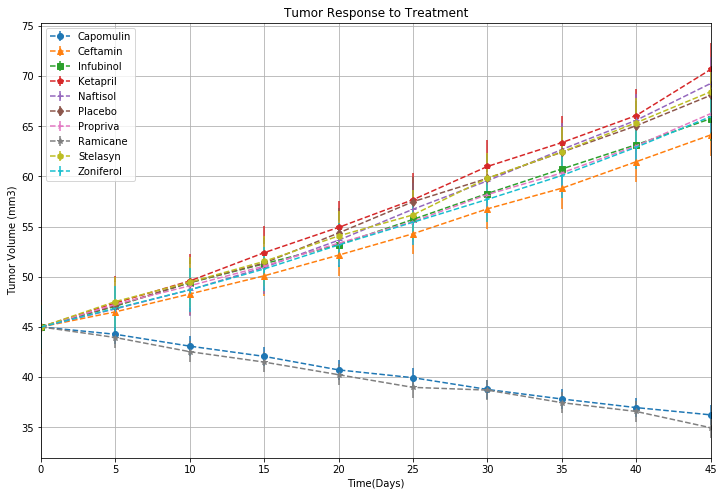

In [121]:
# Generate the Plot (with Error Bars)
Timepoint = Tumor_response.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Tumor_response['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Tumor_response['Naftisol'],yerr=Tumor_response['Naftisol'].sem(), marker ='+', linestyle='--', label="Naftisol")
plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.errorbar(Timepoint, Tumor_response['Propriva'],yerr=Tumor_response['Propriva'].sem(), marker ='4', linestyle='--', label="Propriva")
plt.errorbar(Timepoint, Tumor_response['Ramicane'],yerr=Tumor_response['Ramicane'].sem(), marker ='*', linestyle='--', label="Ramicane")
plt.errorbar(Timepoint, Tumor_response['Stelasyn'],yerr=Tumor_response['Stelasyn'].sem(), marker ='h', linestyle='--', label="Stelasyn")
plt.errorbar(Timepoint, Tumor_response['Zoniferol'],yerr=Tumor_response['Zoniferol'].sem(), marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("/Users/macowner/Desktop/Tumor Response to Treatment.png")
plt.show()




## Metastatic Response to Treatment

In [49]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_Site_avg= combined_data_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
df4 = pd.DataFrame(data = Met_Site_avg)
# Preview DataFrame
df4.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [50]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Met_Site_sem= combined_data_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
df5 = pd.DataFrame(data = Met_Site_sem)
# Preview DataFrame
df5.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [53]:
# Minor Data Munging to Re-Format the Data Frames
Met_Site = pd.pivot_table(df4, index='Timepoint', columns='Drug', values='Metastatic Sites')
Met_Site.head(20)
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


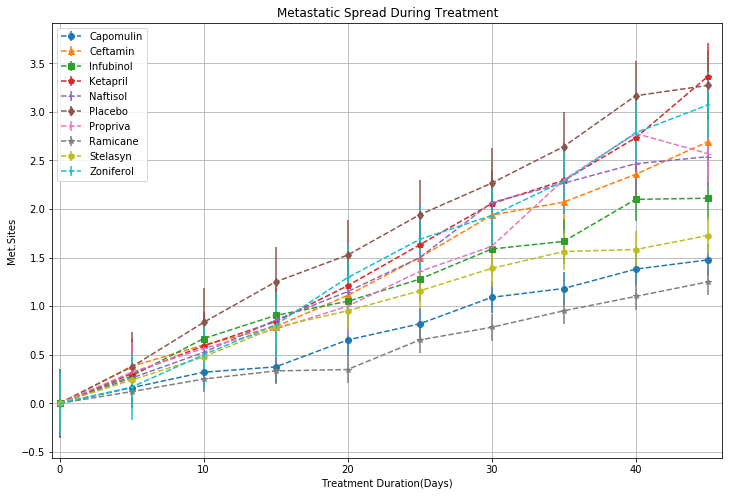

In [122]:
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, Met_Site['Capomulin'],yerr=Met_Site['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Met_Site['Ceftamin'],yerr=Met_Site['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Met_Site['Infubinol'],yerr=Met_Site['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Met_Site['Ketapril'],yerr=Met_Site['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Met_Site['Naftisol'],yerr=Met_Site['Naftisol'].sem(), marker ='+', linestyle='--', label="Naftisol")
plt.errorbar(Timepoint, Met_Site['Placebo'],yerr=Met_Site['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.errorbar(Timepoint, Met_Site['Propriva'],yerr=Met_Site['Propriva'].sem(), marker ='4', linestyle='--', label="Propriva")
plt.errorbar(Timepoint, Met_Site['Ramicane'],yerr=Met_Site['Ramicane'].sem(), marker ='*', linestyle='--', label="Ramicane")
plt.errorbar(Timepoint, Met_Site['Stelasyn'],yerr=Met_Site['Stelasyn'].sem(), marker ='h', linestyle='--', label="Stelasyn")
plt.errorbar(Timepoint, Met_Site['Zoniferol'],yerr=Met_Site['Zoniferol'].sem(), marker ='1', linestyle='--',label="Zoniferol")
plt.gca().set(xlabel = 'Treatment Duration(Days)', ylabel = 'Met.Sites',title = 'Metastatic Spread During Treatment',xlim = (-0.5,max(Timepoint)+1))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("/Users/macowner/Desktop/Metastatic Spread During Treatment.png")
plt.show()

## Survival Rates

In [58]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse_count = combined_data_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
df6 = pd.DataFrame(data = Mouse_count)
# Preview DataFrame
df6 = df6.rename(columns={'Mouse ID':"Mouse Count"})
df6.head()
df6.reset_index().head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [59]:
# Minor Data Munging to Re-Format the Data Frames
Survival_data = pd.pivot_table(df6, index='Timepoint', columns='Drug', values='Mouse Count')
Survival_data.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [67]:
Survival_data_1 = round(Survival_data.apply(lambda c:c/c.max()*100,axis =0),1)
Survival_data_1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.2,100.0,96.2,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.5,96.0,88.5,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.4,96.0,88.5,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.4,92.0,80.8,68.0


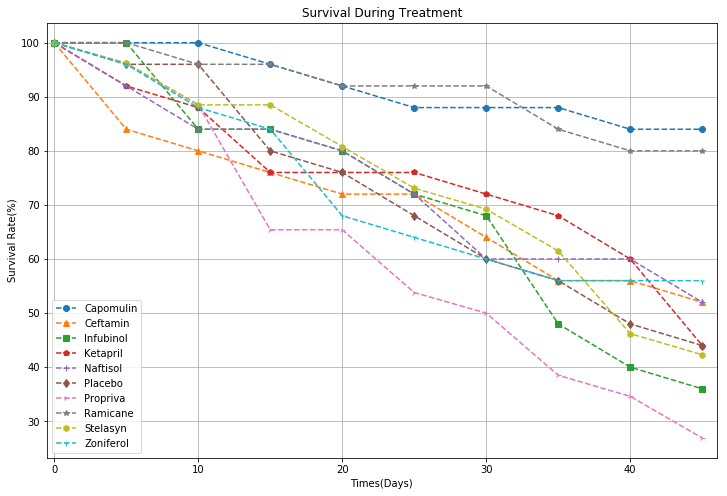

In [123]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(12,8))
plt.plot(Timepoint, Survival_data_1['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Timepoint, Survival_data_1['Ceftamin'], marker ='^', linestyle='--', label="Ceftamin")
plt.plot(Timepoint, Survival_data_1['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Timepoint, Survival_data_1['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Timepoint, Survival_data_1['Naftisol'], marker ='+', linestyle='--', label="Naftisol")
plt.plot(Timepoint, Survival_data_1['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.plot(Timepoint, Survival_data_1['Propriva'], marker ='4', linestyle='--', label="Propriva")
plt.plot(Timepoint, Survival_data_1['Ramicane'], marker ='*', linestyle='--', label="Ramicane")
plt.plot(Timepoint, Survival_data_1['Stelasyn'], marker ='h', linestyle='--', label="Stelasyn")
plt.plot(Timepoint, Survival_data_1['Zoniferol'], marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Times(Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (-0.5,max(Timepoint)+1))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("/Users/macowner/Desktop/Survival During Treatment.png")
plt.show()


## Summary Bar Graph

In [115]:
# Calculate the percent changes for each drug
TumorChangePercent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100).to_frame("% Change")
TumorChangePercent

# Display the data to confirm


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


<Figure size 864x576 with 0 Axes>

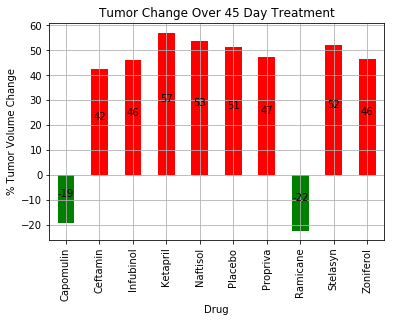

In [124]:
# Store all Relevant Percent Changes into a Tuple
ax = TumorChangePercent.plot(kind = 'bar', 
                             color=[np.where(TumorChangePercent['% Change'] <0,'g','r')],
                             title='Tumor Change Over 45 Day Treatment')
                             
plt.grid()
ax.get_legend().remove()
ax.set_ylabel("% Tumor Volume Change")
rects = ax.patches
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects, ax)



#plt.ylabel('% Tumor Volume Change')

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.savefig("/Users/macowner/Desktop/Tumor Change Over 45 Day Treatment.png")
plt.show()